In [616]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import chi2

In [617]:
PLOT = True
SAVE = True
OUTPUT_GRAPH_PATH = "output_graphs/Histogram_for_labbook.png"
EPOCHS = 80
COMPRESSION = 10
BATCH_SIZE = 500
MODEL_NAME = "AE"
FIT = True

Load the Datasets

In [618]:
orig_file = np.load("/Users/oscarfuentes/baler/workspaces/MNIST/data/mnist_combined.npz")
decomp_file = np.load(
    "/Users/oscarfuentes/baler/workspaces/MNIST/MNIST_project/output/decompressed_output/decompressed.npz"
)

if not np.all(orig_file["names"] == decomp_file["names"]):
    orig_file = np.load("/Users/oscarfuentes/baler/workspaces/MNIST/data/mnist_combined_outlier_order.npz")

orig_data = orig_file["data"].astype(np.float32)
decomp_data = decomp_file["data"].astype(np.float32)
names = orig_file["names"][: len(decomp_data)]


In [619]:
outliers = []
non_outliers = []
outlier_names = []
non_outlier_names = []
orig_non_outliers = []

for count, image in enumerate(orig_data):
    if (
        np.any(image[0] > 0)
        or np.any(image[-1] > 0)
        or np.any(image.T[0] > 0)
        or np.any(image.T[-1] > 0)
    ):
        outliers.append(decomp_data[count])
        outlier_names.append(names[count])
        # outliers = np.append(outliers, image)
        # outlier_names = np.append(outlier_names, loaded["names"][count])
    else:
        # non_outliers = np.append(non_outliers, image)
        # non_outlier_names = np.append(non_outlier_names, loaded["names"][count])
        non_outliers.append(decomp_data[count])
        orig_non_outliers.append(image)
        non_outlier_names.append(names[count])

    if count % 10000 == 0:
        print(f"{count} images processed")

decomp_data = np.array(non_outliers)
names = np.array(non_outlier_names)
orig_data = np.array(orig_non_outliers)
print(len(names))
print(len(orig_data))




0 images processed
10000 images processed
20000 images processed
30000 images processed
40000 images processed
50000 images processed
60000 images processed
69080
69080


Find the indexes for the different numbers

In [620]:
zeros = np.where(names == 0)[0]
ones = np.where(names == 1)[0]
twos = np.where(names == 2)[0]
threes = np.where(names == 3)[0]
fours = np.where(names == 4)[0]
fives = np.where(names == 5)[0]
sixes = np.where(names == 6)[0]
sevens = np.where(names == 7)[0]
eights = np.where(names == 8)[0]
nines = np.where(names == 9)[0]

numbers = [
    [zeros, "zero"],
    [ones, "one"],
    [twos, "two"],
    [threes, "three"],
    [fours, "four"],
    [fives, "five"],
    [sixes, "six"],
    [sevens, "seven"],
    [eights, "eight"],
    [nines, "nine"],
]
print(max(zeros))

69073


Create the "difference" array and find the Sum Square Error for each image

In [621]:
diff_arr = (orig_data - decomp_data).astype(np.float32)

trim_error_list = []
full_error_list = []
for image in diff_arr:
    if (error:=np.sum(image**2)) > 0:
        trim_error_list.append(error)
    full_error_list.append(error)

Make a histogram of the data and plot if chosen

In [606]:
if PLOT:
    fig, ax = plt.subplots()

    n, bins, patches = ax.hist(trim_error_list, bins = int(len(trim_error_list) * 0.005))

    ax.set_xlabel("Error")
    ax.set_ylabel("Count")
    ax.set_title("Baler Errors (Square root of the sum of the squares of the differences)")

    text_string = f"Peak at {bins[np.argmax(n)]:.2f}\nCompression ratio: {COMPRESSION}"+\
    f"\nEpochs: {EPOCHS}\nModel name: {MODEL_NAME}"
    ax.text(x=max(bins) * 0.7, y=max(n) * 0.6, s=text_string)

    # if FIT:
    #     result = chi2.fit(error_list)
    #     fitted = chi2.pdf(bins, result[0], loc=result[1], scale=result[2])
    #     ax.plot(bins, fitted*max(n)/max(fitted))
    #     print(result)
    #     print(max(chi2.pdf(bins, result[0], loc=result[1], scale=result[2])))

    if SAVE:
        plt.savefig(OUTPUT_GRAPH_PATH, dpi = 600, bbox_inches="tight")
        plt.close()
else:
    n, bins = np.histogram(trim_error_list, bins = int(len(trim_error_list) * 0.02))
    print(f"Peak at {bins[np.argmax(n)]:.2f}")


zero peak at 380874.84
Chi2: df=8.09, loc=130508.41, scale=40023.67
Mean: 454380.81

one peak at 121449.62
Chi2: df=6.21, loc=46333.90, scale=18259.02
Mean: 159709.73

two peak at 474916.12
Chi2: df=14.84, loc=108451.87, scale=29637.29
Mean: 548415.88

three peak at 354010.50
Chi2: df=7.02, loc=145137.99, scale=43286.55
Mean: 449040.12

four peak at 310392.12
Chi2: df=6.28, loc=131543.80, scale=44630.17
Mean: 411660.97

five peak at 378959.88
Chi2: df=9.17, loc=138501.85, scale=35027.25
Mean: 459642.75

six peak at 293807.94
Chi2: df=5.45, loc=130360.42, scale=51073.92
Mean: 408578.41

seven peak at 227552.14
Chi2: df=5.27, loc=104622.55, scale=43751.84
Mean: 335388.69

eight peak at 395246.94
Chi2: df=7.90, loc=131289.27, scale=46137.26
Mean: 495981.03

nine peak at 222296.61
Chi2: df=5.40, loc=100731.80, scale=42213.59
Mean: 328678.59



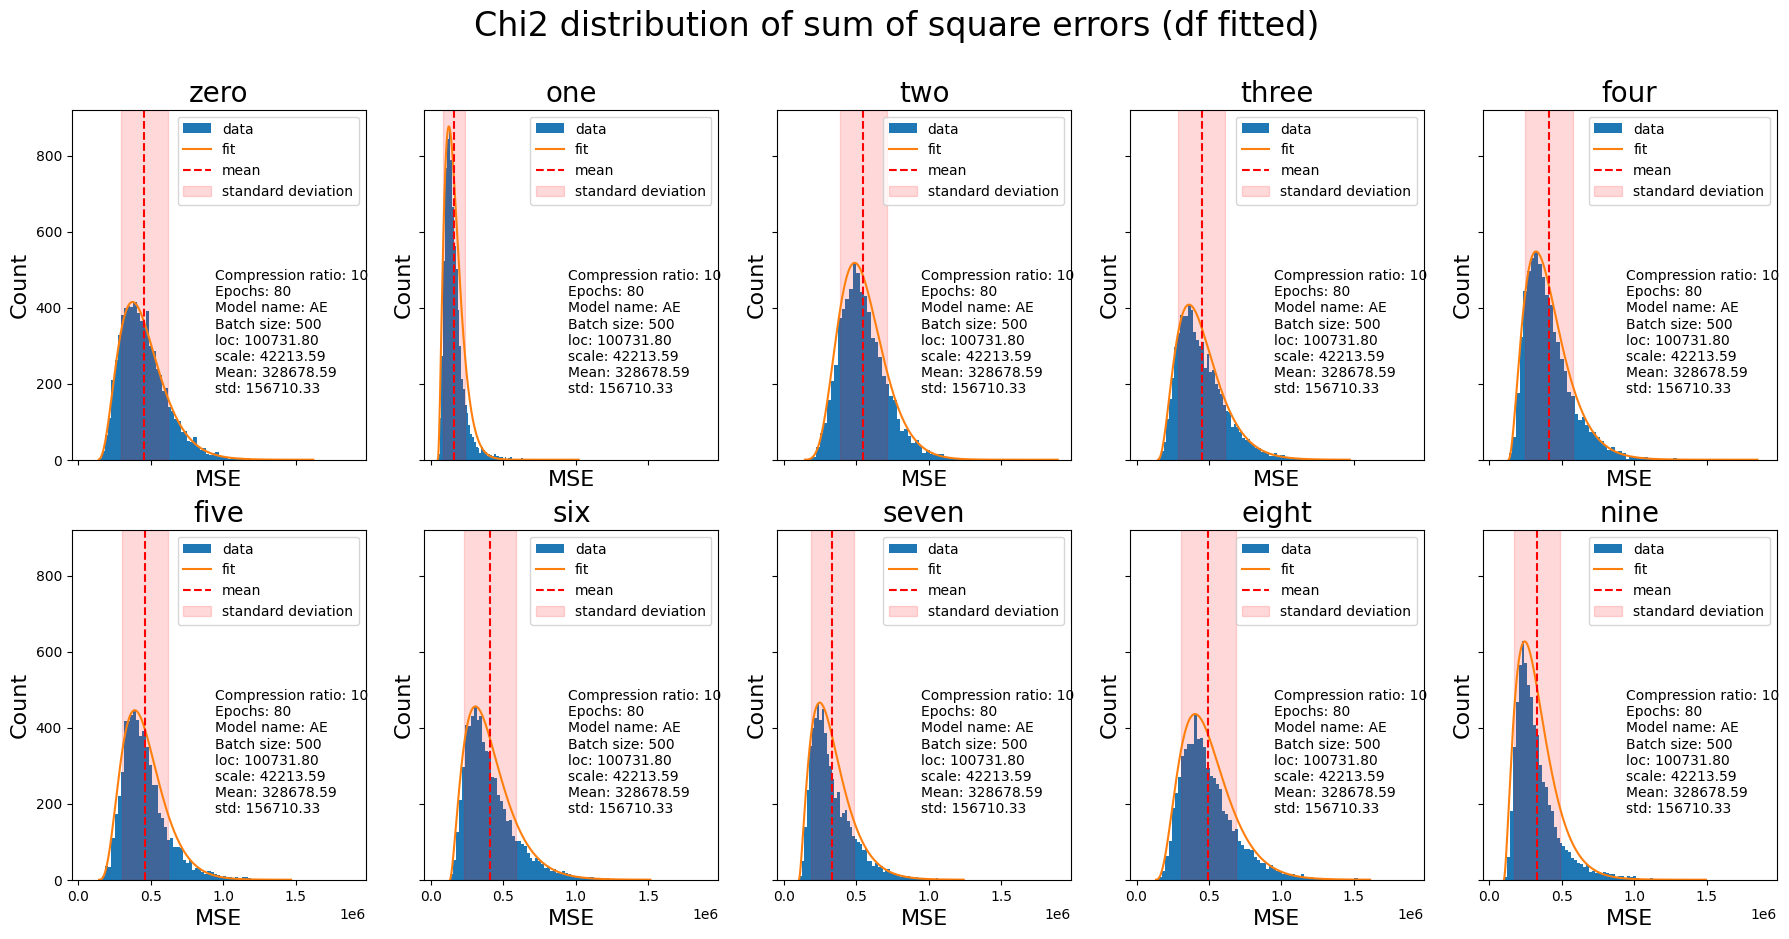

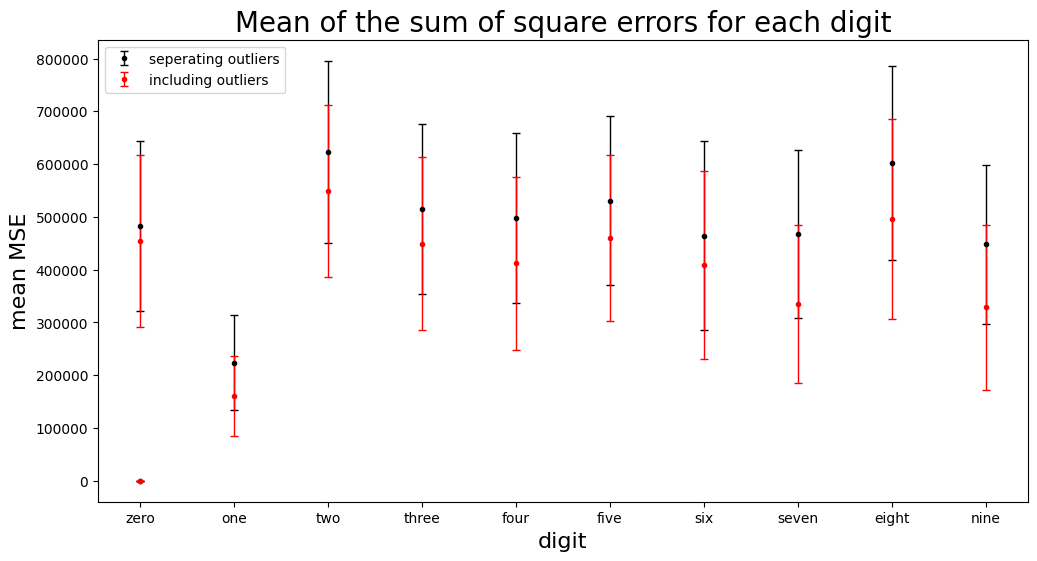

In [626]:
if PLOT:
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(22, 10), sharey=True, sharex=True)
    means2 = []
    stds2 = []
    for number, ax in zip(numbers, axs.flatten()):
        errors = [full_error_list[i] for i in number[0]]
        n, bins, patches = ax.hist(errors, bins = int(len(errors) * 0.01), label="data")
        print(f"{number[1]} peak at {bins[np.argmax(n)]:.2f}")
        ax.set_xlabel("MSE", fontsize=16)
        ax.set_ylabel("Count", fontsize=16)
        ax.set_title(number[1], fontsize=20)
        text_string = f"Compression ratio: {COMPRESSION}"+\
        f"\nEpochs: {EPOCHS}\nModel name: {MODEL_NAME}\nBatch size: {BATCH_SIZE}"

        if number[1] == "one":
            text_y = max(n) * 0.2
        if number[1] == "two":
            text_x = max(bins) * 0.5


        if FIT:
            # df_set = 28
            errors = np.array(errors)
            df, loc, scale = chi2.fit(errors[np.where(errors > 0)])
            for i in range(5):
                if df >= 50:
                    df = 14
                df, loc, scale = chi2.fit(errors[np.where(errors > 0)], df, loc=loc, scale=scale)
            x = np.linspace(bins[0], bins[-1], 1000)
            fitted = chi2.pdf(x, df, loc=loc, scale=scale)
            ax.plot(x, fitted*max(n[2:])/max(fitted), label="fit")
            print(f"Chi2: df={df:.2f}, loc={loc:.2f}, scale={scale:.2f}")
            # x_ax = ax.get_xticks()

            mean = np.mean(errors)
            std = np.std(errors)
            means2.append(mean)
            stds2.append(std)

            ax.axvline(x=mean, color="r", linestyle="dashed", label="mean")
            ax.axvspan(mean-std, mean+std, alpha=0.15, color="r", label="standard deviation")
            ax.legend()
            print(f"Mean: {mean:.2f}\n")
            text_string += f"\nloc: {loc:.2f}\nscale: {scale:.2f}\nMean: {mean:.2f}\nstd: {std:.2f}"
    
    for ax in axs.flatten():
        ax.text(x=text_x, y=text_y, s=text_string)


    fig.suptitle("Chi2 distribution of sum of square errors (df fitted)", fontsize=24)
    if not SAVE:
        plt.savefig("output_graphs/all_chi2_distributions.png", dpi=600)

if PLOT and FIT:
    fig, ax = plt.subplots(figsize=(12, 6))
    for count, number in enumerate(numbers):
        ax.errorbar(number[1], means[count], yerr=stds[count], fmt="k.", capsize=3, elinewidth=1)
        ax.errorbar(number[1], means2[count], yerr=stds2[count], fmt="r.", capsize=3, elinewidth=1)
    ax.errorbar(0,0,yerr=0, fmt="k.", capsize=3, elinewidth=1, label="seperating outliers")
    ax.errorbar(0,0,yerr=0, fmt="r.", capsize=3, elinewidth=1, label="including outliers")
    ax.set_xlabel("digit", fontsize=16)
    ax.set_ylabel("mean MSE", fontsize=16)
    ax.set_title("Mean of the sum of square errors for each digit", fontsize=20)
    ax.legend()
    if SAVE:
        plt.savefig("Mean_MSE_per_digit_comparison.png", dpi=600)

    

        

nine peak at 706957.88
Mean: 1029013.56

Chi2: df=7.63, loc=303184.75, scale=95104.18



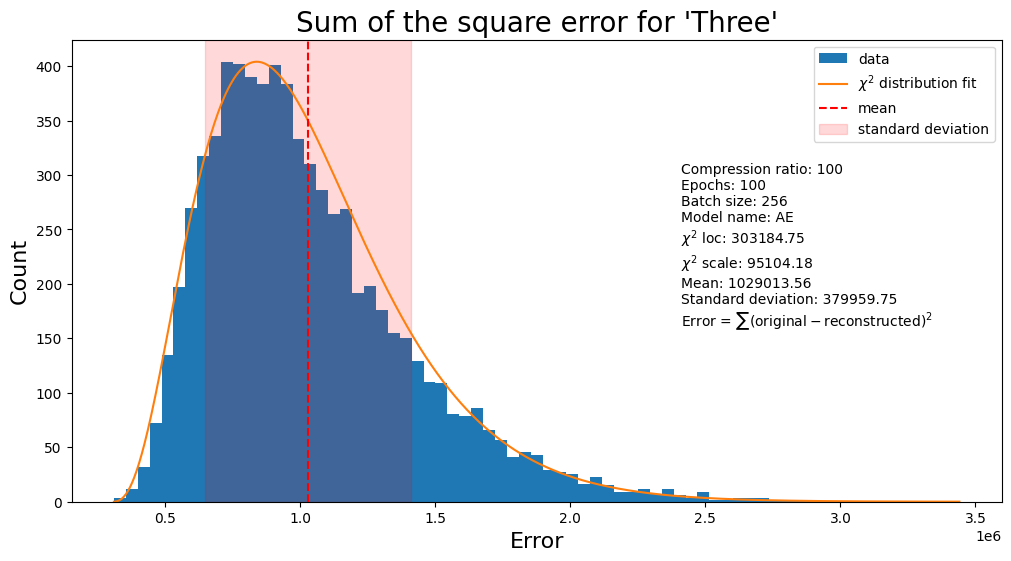

In [586]:
if PLOT:
    fig, ax = plt.subplots(figsize=(12, 6))
    errors = [full_error_list[i] for i in threes]
    n, bins, patches = ax.hist(errors, bins = int(len(errors) * 0.01), label="data")
    print(f"{number[1]} peak at {bins[np.argmax(n)]:.2f}")
    ax.set_xlabel("Error", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.set_title("Sum of the square error for 'Three'", fontsize=20)
    text_string = f"Compression ratio: {COMPRESSION}\nEpochs: {EPOCHS}"+\
        f"\nBatch size: {BATCH_SIZE}\nModel name: {MODEL_NAME}"

    if FIT:
        # df_set = 28
        errors = np.array(errors)
        df, loc, scale = chi2.fit(errors[np.where(errors > 0)])
        for i in range(10):
            if df > 100:
                df = 4
                # scale = 30000
            df, loc, scale = chi2.fit(errors[np.where(errors > 0)], df, loc=loc, scale=scale)
        x = np.linspace(bins[0], bins[-1], 1000)
        fitted = chi2.pdf(x, df, loc=loc, scale=scale)
        ax.plot(x, fitted*max(n[2:])/max(fitted), label="$\chi^2$ distribution fit")
        mean = np.mean(errors)
        std = np.std(errors)

        ax.axvline(x=mean, color="r", linestyle="dashed", label="mean")
        ax.axvspan(mean-std, mean+std, alpha=0.15, color="r", label="standard deviation")
        ax.legend()
        print(f"Mean: {mean:.2f}\n")
        print(f"Chi2: df={df:.2f}, loc={loc:.2f}, scale={scale:.2f}\n")
        text_string += f"\n$\chi^2$ loc: {loc:.2f}\n$\chi^2$ scale: {scale:.2f}"
        text_string += f"\nMean: {mean:.2f}\nStandard deviation: {std:.2f}"
        text_string += "\nError = $\sum (\mathrm{original} - \mathrm{reconstructed})^2$"
    ax.text(bins[-1]*0.7, max(n)*0.4, text_string)
    ax.legend()
    if SAVE:
        plt.savefig("Presentation Graph.png", dpi = 600)

In [587]:
comp_data = np.load("../MNIST_project/output/compressed_output/compressed.npz")
outliers = np.load("../MNIST_project/output/compressed_output/outliers.npz")
print(comp_data["data"].shape)
print(outliers["data"].shape)
print(decomp_data.shape)

(69080, 8)
(920, 28, 28)
(69080, 28, 28)


In [588]:
trial = orig_data[:3]
print(trial[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [589]:
trial = np.transpose(trial, (0, 2, 1))
print(trial[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.  55. 136.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0. 172. 253.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.  18. 226. 253.  

In [594]:
data = np.load("/Users/oscarfuentes/baler/run_multiple_results/results.npz")
print(data)

FileNotFoundError: [Errno 2] No such file or directory: '~/baler/run_multiple_results/results.npz'